# Phase 2 Project



Folder Contents:

In [1]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is 1658-7586

 Directory of c:\Users\DJ\OneDrive - Zero Eyes\DJ\Flatiron\phase_2\project_2\dsc-phase-2-djrachjake

02/15/2023  11:43 AM    <DIR>          .
02/10/2023  12:34 PM    <DIR>          ..
02/10/2023  12:34 PM               163 .canvas
02/10/2023  12:34 PM                70 .gitignore
02/10/2023  12:34 PM             1,846 CONTRIBUTING.md
02/10/2023  12:34 PM    <DIR>          data
02/14/2023  03:03 PM           842,013 dj.ipynb
02/14/2023  04:57 PM           161,915 dj2.ipynb
02/15/2023  11:43 AM           217,315 dj-Copy1.ipynb
02/10/2023  12:34 PM         2,930,391 halfway-there.gif
02/13/2023  11:02 AM           328,458 jake.ipynb
02/10/2023  12:34 PM             1,354 LICENSE.md
02/14/2023  03:13 PM           747,021 rachaelnotebook.ipynb
02/10/2023  12:34 PM            17,557 README.md
02/10/2023  12:34 PM             1,022 student.ipynb
              12 File(s)      5,249,125 bytes
               3 Dir(s)  247,317,1

## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split


plt.style.use('seaborn-notebook')

## Initial Data Exploration

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [5]:
#Find null values
(df.isna().sum().sort_values(ascending=False))/len(df)

heat_source      0.001061
sewer_system     0.000464
id               0.000000
grade            0.000000
lat              0.000000
address          0.000000
yr_renovated     0.000000
yr_built         0.000000
sqft_patio       0.000000
sqft_garage      0.000000
sqft_basement    0.000000
sqft_above       0.000000
condition        0.000000
date             0.000000
view             0.000000
nuisance         0.000000
greenbelt        0.000000
waterfront       0.000000
floors           0.000000
sqft_lot         0.000000
sqft_living      0.000000
bathrooms        0.000000
bedrooms         0.000000
price            0.000000
long             0.000000
dtype: float64

In [6]:
df['grade'].value_counts().sort_index()

1 Cabin              2
10 Very Good      1371
11 Excellent       406
12 Luxury          122
13 Mansion          24
2 Substandard        2
3 Poor              13
4 Low               51
5 Fair             393
6 Low Average     2858
7 Average        11697
8 Good            9410
9 Better          3806
Name: grade, dtype: int64

In [7]:
df['sqft_living'].describe()

count    30155.000000
mean      2112.424739
std        974.044318
min          3.000000
25%       1420.000000
50%       1920.000000
75%       2619.500000
max      15360.000000
Name: sqft_living, dtype: float64

Get zipcode into its own column by splitting it from address column.
Followed by a loop that only keeps the the zipcodes that have a frequency of at least 100 homes in them.

In [8]:
df['yr_renovated'].value_counts()

0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1942        1
1951        1
1948        1
1972        1
1924        1
Name: yr_renovated, Length: 83, dtype: int64

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

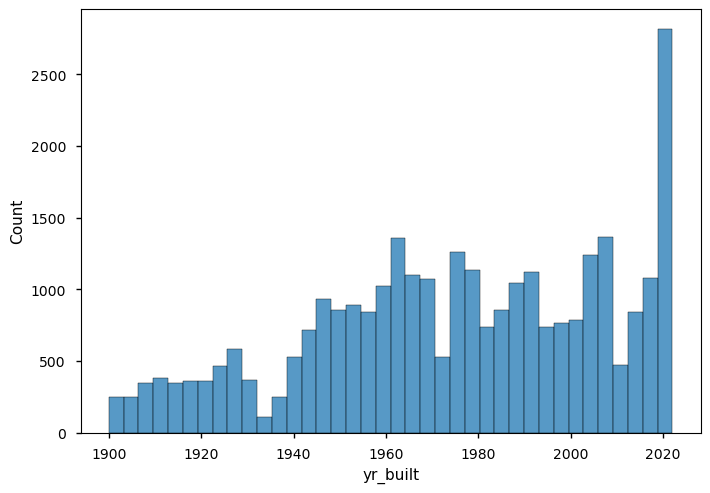

In [9]:
sns.histplot(df['yr_built'])

In [10]:
df['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

Creating columns for Price per square foot for living space, and lot space.

## Data Cleaning and Engineering

Price per square foot columns for Lot and Living.

In [11]:
df['ppsq_living'] = (df['price']/df['sqft_living']).round(2)

In [12]:
df['ppsq_living'].mean()

561.5095244569712

In [13]:
df['ppsq_lot'] = (df['price']/df['sqft_lot']).round(2) #feature engineering lot price per square ft

In [14]:
zips = pd.DataFrame([int(x[-20:-15]) for x in df['address']])
df['zipcode'] = zips
seattle = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98154, 98164, 98174, 98195, 98199]
df = df[df['zipcode'].isin(seattle) == True]
# goodzips = []
# for key, value in df['zipcode'].value_counts().items():
#     if value > 100:
#         goodzips.append(key)
#     else:
#         continue
# len(goodzips)
# df = df[df['zipcode'].isin(goodzips) == True]


In [15]:
pricelot_zipcode = df.groupby('zipcode').mean()['ppsq_lot'].sort_values(ascending=False)

<AxesSubplot:xlabel='zipcode'>

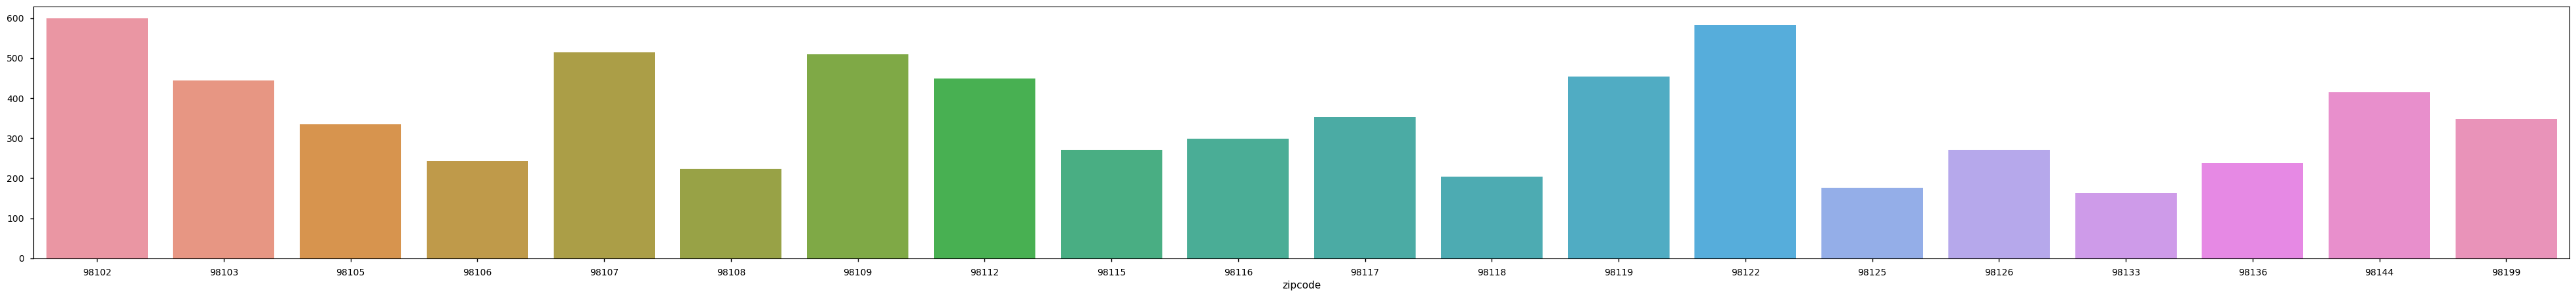

In [16]:
fig, ax = plt.subplots(figsize=(50, 5))

sns.barplot(x=pricelot_zipcode.index, y=pricelot_zipcode.values)

<AxesSubplot:>

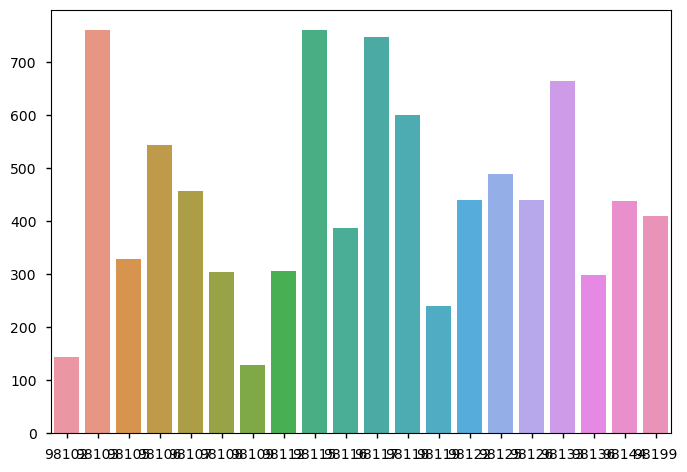

In [17]:
sns.barplot(x = df['zipcode'].value_counts().index, y=df['zipcode'].value_counts().values)

Drop tiny homes from the dataset. In Washington, the tiny home sqaure footage is 400sq ft. 

In [18]:
df = df[df['sqft_living'] > 400]

Turn Columns into numeric values. 
Binary values become 1 if present, 0 if not present

In [19]:
for x in df[['waterfront', 'greenbelt', 'nuisance']]: # converting YES and NO to 1 and 0
    df[x] = df[x].replace("NO", 0).replace("YES", 1)

In [20]:
df[['waterfront', 'greenbelt', 'nuisance']].sum()/len(df)

waterfront    0.006976
greenbelt     0.000450
nuisance      0.257876
dtype: float64

Create new columns for Basement, Patio, and Garage presence. 1 if present (sqaure feet over 0), 0 if not.

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

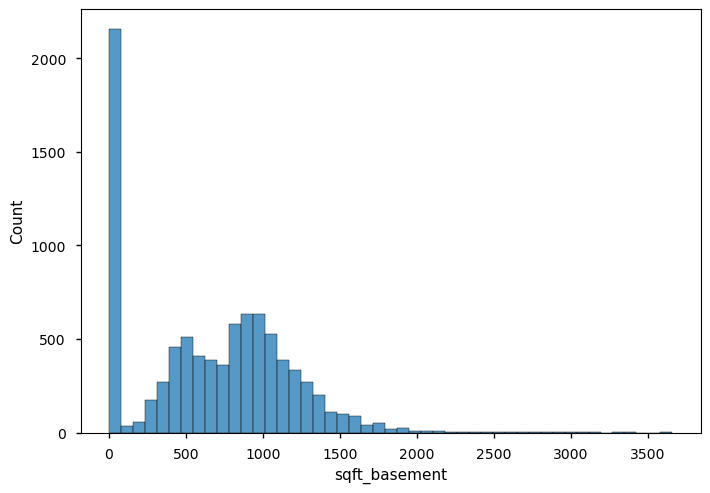

In [21]:
sns.histplot(df['sqft_basement'])

In [22]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      1
sewer_system     4
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
ppsq_living      0
ppsq_lot         0
zipcode          0
dtype: int64

In [23]:
df.reset_index(inplace=True)

In [24]:
basement_no_basement = []
for item in df['sqft_basement']:
    if item > 0:
        basement_no_basement.append(1)
    else:
        basement_no_basement.append(0)
df['basement'] = pd.DataFrame(basement_no_basement)

In [25]:
patio_no_patio = []
for item in df['sqft_patio']:
    if item > 0:
        patio_no_patio.append(1)
    else:
        patio_no_patio.append(0)
df['patio'] = pd.DataFrame(patio_no_patio)

In [26]:
garage_no_garage = []
for item in df['sqft_garage']:
    if item > 0:
        garage_no_garage.append(1)
    else:
        garage_no_garage.append(0)
df['garage'] = pd.DataFrame(garage_no_garage)

In [27]:
df.isna().sum()

index            0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      1
sewer_system     4
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
ppsq_living      0
ppsq_lot         0
zipcode          0
basement         0
patio            0
garage           0
dtype: int64

Drop Address, Latitude, Longitude, and Condition

In [28]:
df.drop(['address', 'lat', 'long', 'condition', 'date', 'index', 'id'], axis=1, inplace=True)

Finding the IQR for Price, ruling out outliers by multiplying IQR by 1.5

In [29]:
iqrprice = np.percentile(df['price'], 75) -np.percentile(df['price'], 25)
lower_lim_price =np.percentile(df['price'], 25) - 1.5*iqrprice
upper_lim_price =np.percentile(df['price'], 75) + 1.5*iqrprice
print(f'anything above {upper_lim_price} and below {lower_lim_price} is an outlier')

anything above 2047750.0 and below -70250.0 is an outlier


In [30]:
df = df[df['price'] < upper_lim_price] #filtering out the outliers based on the above cell

c:\Users\DJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

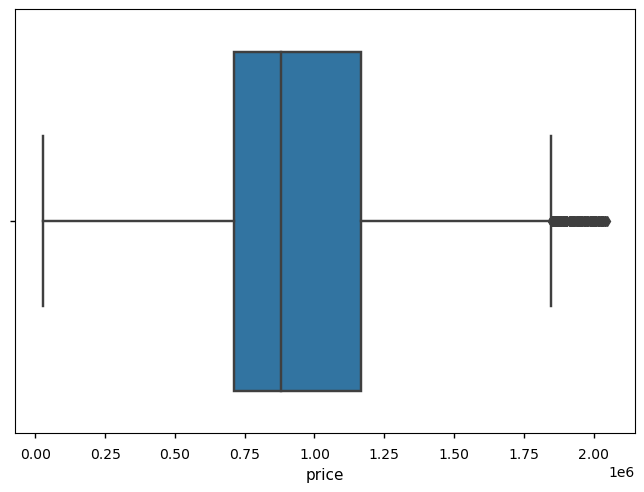

In [31]:
sns.boxplot(df['price'])

In [44]:
df.shape

(1345, 25)

In [46]:
scaler = StandardScaler().fit_transform(df.drop(['view', 'grade', 'heat_source', 'sewer_system'], axis=1))
scaled_df = pd.DataFrame(scaler)
scaled_df.columns = df.drop(['view', 'grade', 'heat_source', 'sewer_system'], axis=1).columns
scaled_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,sqft_above,...,sqft_garage,sqft_patio,yr_built,yr_renovated,ppsq_living,ppsq_lot,zipcode,basement,patio,garage
0,-0.515940,-0.969629,-0.690243,-1.038312,-0.227526,0.956619,0.0,-0.027277,-0.556453,-0.724683,...,-0.725943,-0.357928,0.942205,0.0,1.097323,-0.588558,-0.912988,-1.236202,0.290994,-0.796407
1,-0.547009,0.178391,-0.690243,-0.072797,-0.358516,0.956619,0.0,-0.027277,-0.556453,0.170720,...,0.682181,-1.379969,0.942205,0.0,-0.783121,-0.315829,0.816221,0.808929,0.290994,1.255639
2,-0.680066,0.178391,1.680081,0.181286,-0.079450,-0.856845,0.0,-0.027277,-0.556453,0.040141,...,1.470731,-0.895845,0.942205,0.0,-1.229879,-0.918085,-0.740067,0.808929,0.290994,1.255639
3,-0.234757,0.178391,-0.690243,-0.445452,-0.652958,0.956619,0.0,-0.027277,1.797098,-0.780646,...,-0.725943,1.255821,0.180856,0.0,0.241556,1.520390,-0.106024,0.808929,0.290994,-0.796407
4,0.124334,1.326412,0.099865,0.401491,0.719019,0.049887,0.0,-0.027277,-0.556453,0.860927,...,-0.725943,-1.541344,-2.103192,0.0,-0.469646,-1.220529,-0.624787,-1.236202,-3.436499,-0.796407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,1.226585,0.178391,0.099865,1.045168,1.387068,-0.856845,0.0,-0.027277,-0.556453,1.569788,...,1.752356,-1.541344,-1.341843,0.0,0.017596,-1.225618,0.816221,-1.236202,-3.436499,1.255639
1341,-0.265982,0.178391,-0.690243,-0.021980,-0.184812,-0.856845,0.0,-0.027277,1.797098,-0.538141,...,-0.725943,1.417195,-0.961168,0.0,-0.458089,-0.508392,0.182178,0.808929,0.290994,-0.796407
1342,0.249235,0.178391,-0.690243,-0.276063,-0.527094,0.956619,0.0,-0.027277,-0.556453,0.114758,...,-0.725943,0.664113,0.942205,0.0,0.682638,1.125116,-0.682427,-1.236202,0.290994,-0.796407
1343,-1.747217,0.178391,1.680081,-0.309941,-0.418885,-0.856845,0.0,-0.027277,1.797098,-0.538141,...,-0.725943,-0.304137,-0.199819,0.0,-2.309948,-1.181338,-0.682427,0.808929,0.290994,-0.796407


In [47]:
X = scaled_df[['sqft_above', 'basement', 'garage']]
y = scaled_df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     442.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          7.24e-200
Time:                        12:51:22   Log-Likelihood:                -1445.5
No. Observations:                1345   AIC:                             2899.
Df Residuals:                    1341   BIC:                             2920.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.093e-17      0.019   3.15e-15      1.000      -0.038       0.038
sqft_above     0.7750      0.023     33.001      0.000       0.729       0.821
basement       0.3363      0.023     14.651      0.000       0.291       0.381
garage        -0.1432      0.025     -5.812      0.000      -0.192      -0.095
==============================================================================
Omnibus:                      126.641   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              848.072
Skew:                           0.029   Prob(JB):                    6.97e-185
Kurtosis:                       6.890   Cond. No.                         2.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model.fit().mse_total

1.0007440476190477

In [60]:
print('for every {} sqft increased above ground price increases by {}'.format(round(df['sqft_above'].std(), 2), round((df['price'].std()*.7839), 2)))

for every 536.27 sqft increased above ground price increases by 251140.26


In [ ]:
print('For every {} sqft increased above ground, price increases by ${}'
      .format(round(df['sqft_above'].std(),2), round((df['price'].std().7839),2)))
print('For every {} basement added, price increases by ${}'
      .format(round(df['basement'].std(),2), round((df['price'].std().3085),2)/df['basement'].std(),2))
print('For every {} sqft increased in a garage, price decreases by ${}'
      .format(round(df['sqft_garage'].std(),2), round((df['price'].std().1488),2)))
print('For every {} sqft increased on a patio, price increases by ${}'
      .format(round(df['sqft_patio'].std(),2), round((df['price'].std().1597),2)))
print('For every {} nuisance present, price decreases by ${}'
      .format(round(df['nuisance'].std(),2), round((df['price'].std()*.0647),2)))

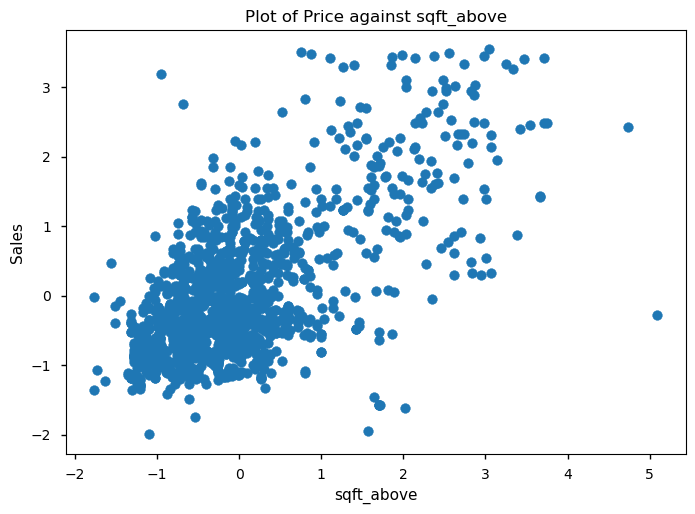

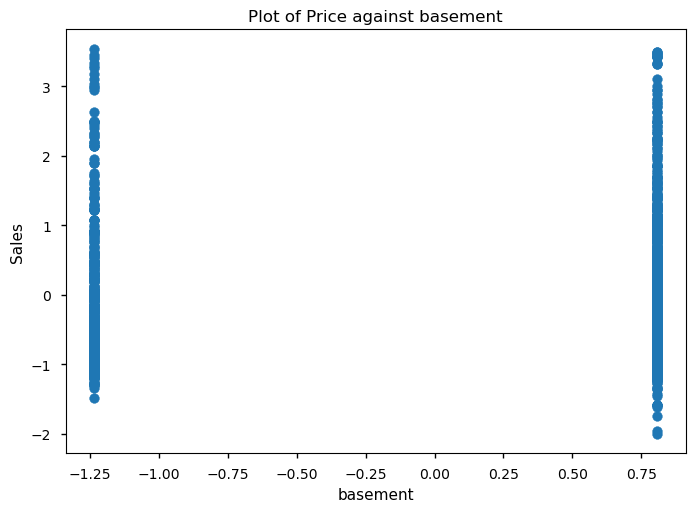

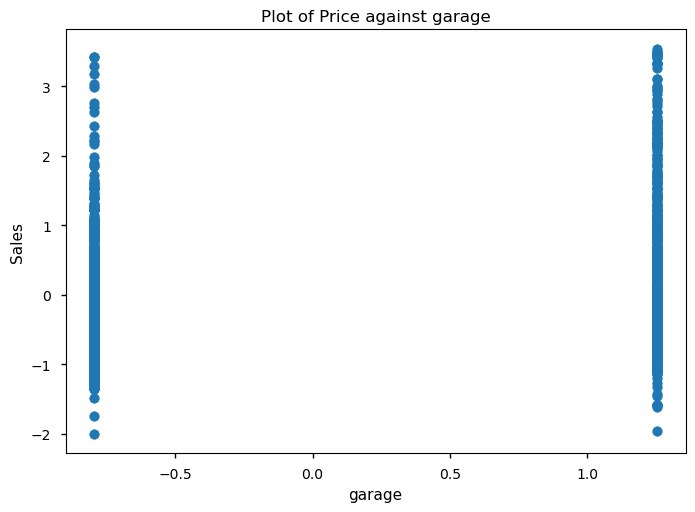

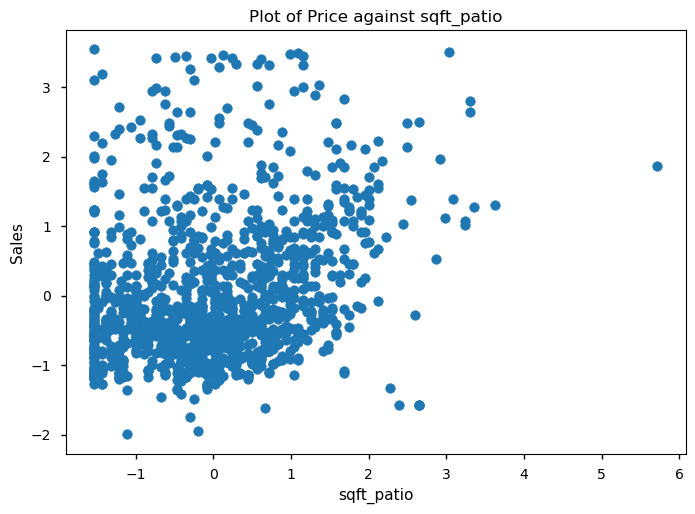

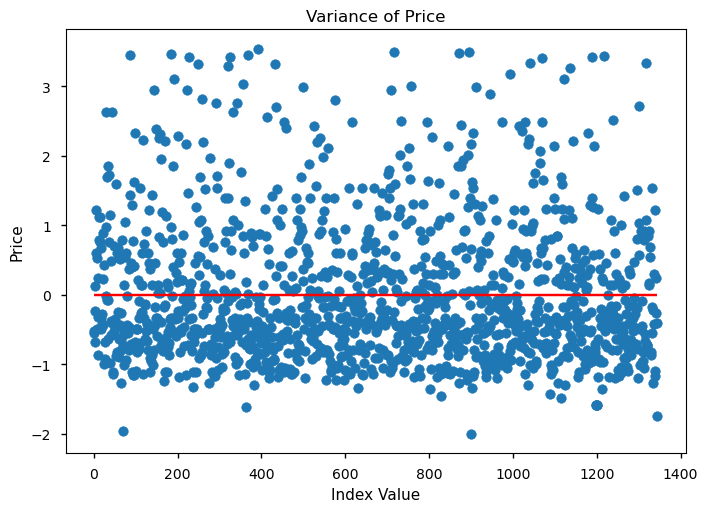

In [51]:
df_interest = scaled_df[['sqft_above', 'basement', 'garage', 'sqft_patio', 'price']]
features = df_interest.drop('price',axis=1).columns

for x in features:
    plt.scatter(df_interest[x], df_interest['price'])
    plt.title(f'Plot of Price against {x}')
    plt.xlabel(x)
    plt.ylabel('Sales')
    plt.show()
    
# also plot sales against itself
plt.scatter(scaled_df.index, scaled_df['price'])
plt.hlines(scaled_df['price'].mean(), 0, len(scaled_df), colors='r')
plt.xlabel('Index Value')
plt.ylabel('Price')
plt.title('Variance of Price')
plt.show()

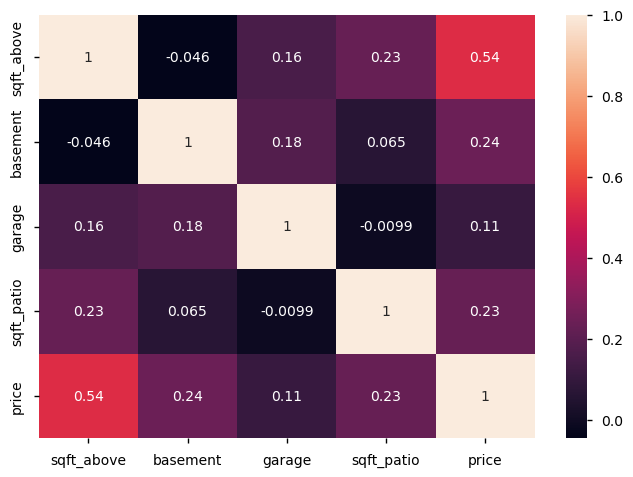

In [37]:
ax = sns.heatmap(df_interest.corr(), annot=True)
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    scaled_df.drop('price', axis=1), scaled_df['price'], test_size=0.33, random_state=42)

<AxesSubplot:xlabel='price', ylabel='Count'>

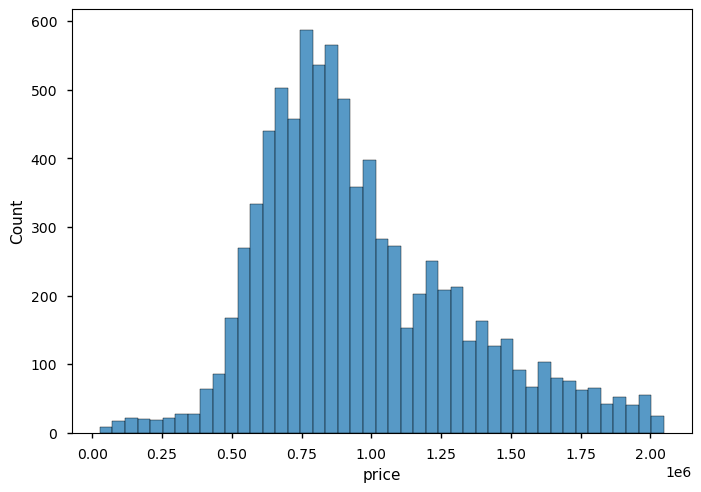

In [39]:
sns.histplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

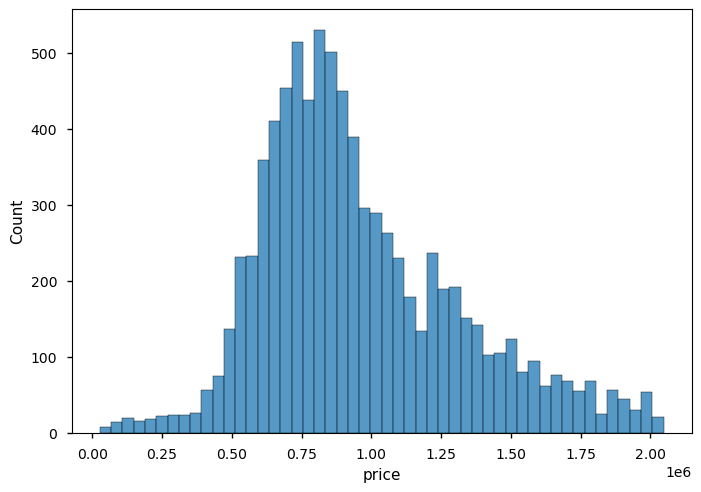

In [40]:
sns.histplot(df['price'], bins=50)

Finding the IQR for Bedrooms, ruling out outliers by multiplying IQR by 1.5

In [41]:
iqrbedrooms = np.percentile(df['bedrooms'], 75) -np.percentile(df['bedrooms'], 25) ##calculating the upper and lower limits for outliers using iqr*1.5
lower_lim_bedrooms =np.percentile(df['bedrooms'], 25) - 1.5*iqrbedrooms
upper_lim_bedrooms =np.percentile(df['bedrooms'], 75) + 1.5*iqrbedrooms
print(f'anything above {upper_lim_bedrooms} and below {lower_lim_bedrooms} is an outlier')

anything above 7.0 and below -1.0 is an outlier


In [42]:
df = df[df['yr_built'] >= 2013]

In [43]:
df.drop(['id', 'date', 'yr_renovated'], axis=1, inplace=True)

KeyError: "['id', 'date'] not found in axis"

## Initial Analysis for building models

In [ ]:
df.corr()['price'].sort_values(ascending=False)

In [ ]:
#sns.pairplot(df)

In [ ]:
df

## Dummy Regressor

In [ ]:
df['avg_price'] = df['price'].mean()
X = df['avg_price']
y = df['price']
dummy_model = sm.OLS(y, sm.add_constant(X)).fit()
dummy_model.summary() 

In [ ]:
viewdummy = pd.get_dummies(df['view'], drop_first=True, prefix='view')
viewdata = pd.concat([df['price'],viewdummy], axis=1)
viewdata.corr()['price'].sort_values(ascending=False)

In [ ]:
X_ohe = sm.add_constant( viewdata.drop(['price'], axis=1))

all_mod = sm.OLS(viewdata['price'], X_ohe)

all_results = all_mod.fit()
print(all_results.summary())

In [ ]:
sns.histplot(df['bedrooms'], bins=10)

In [ ]:
pricebybedrooms=df.groupby('bedrooms').mean()['price'].sort_index()

In [ ]:
sns.barplot(x=pricebybedrooms.index, y=pricebybedrooms.values)

In [ ]:
sns.boxplot(df['bedrooms'])

In [ ]:
df['heat_source'].value_counts()

In [ ]:
df.corr()['price'].sort_values(ascending=False)

In [ ]:
pd.get_dummies(df).corr()['price'].sort_values(ascending=False)

In [ ]:
df.groupby('grade').mean()['price'].sort_values(ascending=False)

In [ ]:
pd.get_dummies(df['view']).corrwith(df['price'])

In [ ]:
df[['bedrooms', 'bathrooms']]

In [ ]:
y= df['price']
x = sm.add_constant(df[['bedrooms', 'bathrooms', 'ppsq_living', 'sqft_above']])
sm.OLS(y,x).fit().summary()


In [ ]:
y= df['price']
x = sm.add_constant(df[['sqft_living', 'ppsq_living']])
sm.OLS(y,x).fit().summary()


In [ ]:
grade = pd.get_dummies(df['grade'],drop_first=True)
df_w_grade = pd.concat([df[['price','bedrooms', 'bathrooms', 'sqft_above', 'sqft_garage', 'sqft_basement']].reset_index(), grade.reset_index()], axis=1)

In [ ]:
df_w_grade.drop('index', axis=1, inplace=True)

In [ ]:
df_w_grade.sum()

In [ ]:
y= df_w_grade['price']
x = sm.add_constant(df_w_grade.drop(['price', 'bedrooms', 'bathrooms'], axis=1))
sm.OLS(y,x).fit().summary()

In [ ]:
y= df['price']
x = sm.add_constant(df[['ppsq_living', 'sqft_above', 'sqft_garage', 'sqft_basement']])
sm.OLS(y,x).fit().summary()

In [ ]:
df['lot_home_ratio'] = (df['sqft_living']/df['sqft_lot']).round(2)

In [ ]:
X = df[['lot_home_ratio', 'ppsq_living']]
y = df['price']
dummy_model = sm.OLS(y, sm.add_constant(X))
dummy_model.fit().summary() 

In [ ]:
df['heat_source'].isin(['Electricity/Solar', 'Gas/Solar']).sum()

In [ ]:
df['heat_source'].value_counts()

In [ ]:
source = []
df.reset_index(inplace=True)
for heat in df['heat_source']:
    if heat == 'Electricity/Solar' or heat == 'Gas/Solar':
        source.append('Solar')
    else:
        source.append(heat)
    source_df = pd.DataFrame(source)
    df['heat_source_2'] = source_df

In [ ]:
df.drop(['index'], axis=1)

In [ ]:
df['heat_source_2'].value_counts()

In [ ]:
dummy_heat = pd.get_dummies(df['heat_source_2'])
dummy_heat.corrwith(df['price'])

In [ ]:
#dummy_heat_df[['sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'price']].corr()

In [ ]:
##x....
#y = dummy_heat_df['price']
#dummy_model = sm.OLS(y, sm.add_constant(X))
#dummy_model.fit().summary()

In [ ]:
#X = dummy_heat_df[['sqft_living']]
#y = dummy_heat_df['price']
#dummy_model = sm.OLS(y, sm.add_constant(X))
#dummy_model.fit().summary()

In [ ]:
#dummy_heat_df[['sqft_above', 'sqft_basement', 'sqft_patio', 'price']].corr()

In [ ]:
#column_list = list(dummy_heat_df.columns)
#column_list

In [ ]:
sns.scatterplot(x= df['sqft_garage'], y=df['price'])

In [ ]:
X = df[['sqft_above', 'sqft_basement', 'garage', 'sqft_patio']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
df[['sqft_above', 'sqft_basement', 'garage', 'sqft_patio']].corr()

In [ ]:
sns.histplot(df['sqft_above'])

In [ ]:
X = df[['sqft_above', 'basement', 'garage', 'sqft_patio']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
sns.histplot(df['sqft_patio'])

In [ ]:
X = df[['sqft_above', 'basement', 'patio', 'garage']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
X = df[['sqft_above', 'basement', 'garage']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

In [ ]:
df = pd.concat([df, dummy_heat], axis=1)

In [ ]:
df.drop('heat_source_2', axis=1)